In [103]:
%matplotlib inline
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
MODEL_PATH = "C:\\Users\\gangcha\\Downloads\\New folder\\ml\\model\\"

In [46]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

In [33]:
model = KeyedVectors.load_word2vec_format("C:\\Users\\gangcha\\Downloads\\PythonWork\\ml\\pretrained\\word2vec.6B.300d.txt")

In [81]:
def analogies(query):
    global model
    a,b = query.split('=')
    a1,a2 = a.split('-')
    b1,b2 = b.split('-')
    out,_ = model.similar_by_vector(vector = model[b2]+model[a1]-model[a2])[1]
    ans = 'The relation between {} and {} is same as {} and {}'.format(a1,a2,out,b2)
    print(ans)
def preprocessing_sentence(sentence):
    res=[]
    global stop_words
    for i in sentence.split(' '):
        if not i.lower() in stop_words:
            res.append(i.lower())
    return res
def distance(v1,v2):
    return sum([(i-j)**2 for i,j in zip(v1,v2)])**0.5

In [35]:
model.most_similar('mother')
print(model.most_similar('baghdad'))
model.most_similar('delhi')

[('iraqi', 0.7455282807350159), ('iraq', 0.7278226613998413), ('mosul', 0.7166557312011719), ('fallujah', 0.6875258088111877), ('basra', 0.6821593046188354), ('iraqis', 0.6439340710639954), ('najaf', 0.626160740852356), ('saddam', 0.6256827116012573), ('hussein', 0.6077781915664673), ('tikrit', 0.6056607961654663)]


[('india', 0.6846907138824463),
 ('islamabad', 0.673266589641571),
 ('mumbai', 0.6564980745315552),
 ('lahore', 0.6211020946502686),
 ('kolkata', 0.598203182220459),
 ('indian', 0.590014636516571),
 ('hyderabad', 0.5881937742233276),
 ('bangalore', 0.5874884128570557),
 ('dhaka', 0.5801740884780884),
 ('lucknow', 0.5714719295501709)]

# Analogies Demonstartion

##### Here we will use word2vec embedding to check the semantic relationship in representation of words
##### Input is a query in format  A - B= ____ - D.Here model needs to predict best possible word to complete this analogy

* Three types of context have been used for demo
   * ** Gender **  (Relation b/w * **men and women** * is same as * **king and queen** *) 
   * ** Logic **  (Capturing grammatical logic like **anonyms ,synonyms** )
   * ** Location ** (Capturing ** Capital and State** relationship)

In [36]:
########################################## Gender  #########################################
queries = ["men-women=?-queen","men-women=?-granddaughter","men-women=?-nanny"]
out = [analogies(i) for i in queries]

The relation between men and women is same as king and queen
The relation between men and women is same as grandson and granddaughter
The relation between men and women is same as housekeeper and nanny


In [37]:
######################################### Logic  ##########################################
queries = ["coward-brave=?-fastest","coward-brave=?-painter","mosul-baghdad=?-army"]
out = [analogies(i) for i in queries]

The relation between coward and brave is same as slowest and fastest
The relation between coward and brave is same as sculptor and painter
The relation between mosul and baghdad is same as soldiers and army


In [38]:
########################################## Place  ###############################################
queries = ["germany-frankfurt=?-washington"]
out = [analogies(i) for i in queries]

The relation between germany and frankfurt is same as states and washington


In [32]:
del model

### We will now use the embeddings to capture the similarity b/w sentences 


** Sentence list is a list of sentences **

In [91]:
sentence_list = ["Obama speaks to the media in Illinois",
                 "The President greets the press in Chicago",
                 "Lion is a evil creature",
                 "Harry potter is an awesome movie",
                 "Return i got on my mutual funds was much greater than fixed deposit",
                 "Fixed terms deposit are low in performance in comparison to mutual funds"
                ]

** To create data to feed our model we will remove words like *(the, a ,an etc)* which doesn't provide any useful information to model **

In [92]:
sentence_list_separate = [preprocessing_sentence(i) for i in sentence_list]

### List of words from each sentence

In [93]:
sentence_list_separate

[['obama', 'speaks', 'media', 'illinois'],
 ['president', 'greets', 'press', 'chicago'],
 ['lion', 'evil', 'creature'],
 ['harry', 'potter', 'awesome', 'movie'],
 ['return', 'got', 'mutual', 'funds', 'much', 'greater', 'fixed', 'deposit'],
 ['fixed',
  'terms',
  'deposit',
  'low',
  'performance',
  'comparison',
  'mutual',
  'funds']]

### Convert list of words into list of numbers to feed our model

In [94]:
embedding_vector_list=[]
for sen in sentence_list_separate:
    ans=[]
    for i in sen:
        ans.append(model[i])
    embedding_vector_list.append(ans)

### We will create mathematical representation of sentences by averaging the embeddings of words

<img src='diag1.jpg'/>

### We will do this for all the sentences and store the result in sen_2_vec

In [97]:
sen_2_vec = [sum(i)/len(i) for i in embedding_vector_list]

### We have converted every sentence into list of numbers

In [129]:
[(sentence_list[i],list(sen_2_vec[i][:3])) for i in range(len(sen_2_vec))]

[('Obama speaks to the media in Illinois',
  [-0.24391201, 0.156996, -0.10875125]),
 ('The President greets the press in Chicago',
  [0.150305, 0.0742895, -0.078365006]),
 ('Lion is a evil creature', [-0.12688333, -0.16390999, -0.042286668]),
 ('Harry potter is an awesome movie', [-0.20578098, -0.085875, -0.16519266]),
 ('Return i got on my mutual funds was much greater than fixed deposit',
  [-0.33279693, -0.17225698, -0.06359725]),
 ('Fixed terms deposit are low in performance in comparison to mutual funds',
  [-0.33559373, 0.004683502, 0.09671287])]

### For each combination of sentence we will calculate their distance to each other 
* The smaller the distance more similar they are

In [123]:
ans=[]
for i in range(len(sen_2_vec)):
    temp=[]
    for j in range(len(sen_2_vec)):
        temp.append(distance(sen_2_vec[i],sen_2_vec[j]))
    ans.append(temp)

#### This is a similarity heatmap the darker the shape more similar are the sentences 
* Since every sentence is 100% similar to itself or distance b/w them is 0 represented by black color
* We can find similar sentences using distance for e.g
    * Distance between __Obama speaks to media in Illinois__ and __ The president greets the press in Chicago __ is **3.5**
    * Distance between __Obama speaks to media in Illinois__ and __ Lion is a evil creature __ is **5.9**
  
    * Hence first group of sentences are more similar than later ones

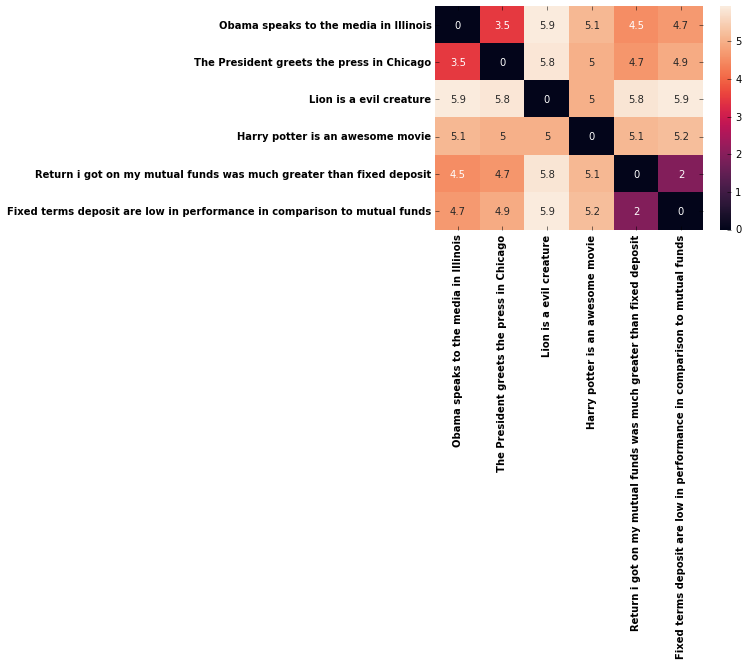

In [124]:
plot = sns.heatmap(ans,annot=True,xticklabels=sentence_list,yticklabels=sentence_list)
plot.set_xticklabels(rotation=90,labels=sentence_list,size='medium',weight='bold')
plot.set_yticklabels(rotation=0,labels=sentence_list,size='medium',weight='bold')


Similar Group of sentences

In [135]:
res = []
for i in range(len(sen_2_vec)):
    for j in range(i+1,len(sen_2_vec)):
        if not i==j:
            if ans[i][j]<3.7:
                res.append((i,j))
for i,j in res:
    print(sentence_list[i],"<------->",sentence_list[j])

Obama speaks to the media in Illinois <-------> The President greets the press in Chicago
Return i got on my mutual funds was much greater than fixed deposit <-------> Fixed terms deposit are low in performance in comparison to mutual funds


### These kind of model can be used to segregate documents into several categories.
### The documents could be ** emails,pdfs,html,web pages etc **